## Fasttext Algorithm 

<img src="image/fasttext.png",width=800,height=800>

In [1]:
# import modules & set up logging
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import time

#### https://radimrehurek.com/gensim/models/fasttext.html

gensim.models.fasttext.FastText(sentences=None, corpus_file=None, sg=0, hs=0, size=100,  
alpha=0.025, window=5,min_count=5, max_vocab_size=None, word_ngrams=1, sample=0.001, seed=1, workers=3,min_alpha=0.0001, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, iter=5, null_word=0, min_n=3, max_n=6, sorted_vocab=1, bucket=2000000, trim_rule=None, batch_words=10000, callbacks=())

## Example

In [2]:
from gensim.test.utils import common_texts
from gensim.models import FastText

common_texts = [['ilk', 'cümle'], ['ikinci', 'cümle']]
model = FastText(common_texts, size=4, window=3, min_count=1)

2018-10-04 23:41:57,553 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-10-04 23:41:57,554 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2018-10-04 23:41:57,555 : INFO : collecting all words and their counts
2018-10-04 23:41:57,556 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-04 23:41:57,558 : INFO : collected 3 word types from a corpus of 4 raw words and 2 sentences
2018-10-04 23:41:57,558 : INFO : Loading a fresh vocabulary
2018-10-04 23:41:57,559 : INFO : min_count=1 retains 3 unique words (100% of original 3, drops 0)
2018-10-04 23:41:57,560 : INFO : min_count=1 leaves 4 word corpus (100% of original 4, drops 0)
2018-10-04 23:41:57,561 : INFO : deleting the raw counts dictionary of 3 items
2018-10-04 23:41:57,563 : INFO : sample=0.001 downsamples 3 most-common words
2018-10-04 23:41:57,564 : INFO : downsampling leaves esti

In [3]:
print(model)
print("*"*50)
print(model.wv.vocab)

FastText(vocab=3, size=4, alpha=0.025)
**************************************************
{'ilk': <gensim.models.keyedvectors.Vocab object at 0x7f7bd90a4a58>, 'cümle': <gensim.models.keyedvectors.Vocab object at 0x7f7bd90a4d30>, 'ikinci': <gensim.models.keyedvectors.Vocab object at 0x7f7bd90a4ba8>}


# Project

<img src="image/kemik.png",width=500,height=500>

dataset : [3000 Turkish Tweets for sentiment analysis (3 classes)](http://www.kemik.yildiz.edu.tr/?id=28)

In [4]:
# data load

from glob import glob

tweet_list = []

for index, file in enumerate(glob('data/3000tweet/raw_texts/**/*.txt', recursive=True)):                                                             # labels
    tweet_list.append((open(file, encoding="windows-1254").read().replace('\n', ' ').strip().lower()))      # tweets

print("3000 tweet  :  ", len(tweet_list))


3000 tweet  :   3000


In [5]:
# preprocessing

import Stemmer
import re


def splitIntoStem(message):
    
    return [removeNumeric(stripEmoji(singleCharacterRemove(removePunctuation
                                                           (removeHyperlinks
                                                            (removeHashtags
                                                             (removeUsernames
                                                              (stemWord(word)))))))) for word in message.split()]

def stemWord(tweet):

    ################################## for turkish
    #stemmer = Stemmer.Stemmer('turkish')
    #return stemmer.stemWord(tweet).lower()
    
    return tweet.lower()

#remove usernames
def removeUsernames(tweet):
    return re.sub('@[^\s]+', '', tweet)


#remove hashtag
def removeHashtags(tweet):
    return re.sub(r'#[^\s]+', '', tweet)

#remove link
def removeHyperlinks(tweet):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', tweet)

def removeNumeric(value):
    blist2 = [item for item in value if not item.isdigit()]
    blist3 = "".join(blist2)
    return blist3

def removePunctuation(tweet):

    return re.sub(r'[^\w\s]','',tweet)

def singleCharacterRemove(tweet):
    return re.sub(r'(?:^| )\w(?:$| )', ' ', tweet)


def stripEmoji(text):

    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return RE_EMOJI.sub(r'', text)

In [6]:
tweet_list[0]

'#turkcell superonline bir milyon evin kapisina fiber internet goturdu bizde niye yok bize niye getirmiyorlar :))'

In [7]:
for i,k in enumerate(tweet_list):
    tweet_list[i] = " ".join(splitIntoStem(k)).split()

In [8]:
tweet_list[0]

['superonline',
 'bir',
 'milyon',
 'evin',
 'kapisina',
 'fiber',
 'internet',
 'goturdu',
 'bizde',
 'niye',
 'yok',
 'bize',
 'niye',
 'getirmiyorlar']

In [9]:
import string

def sumTweetWords():
    new_value = ""
    for i in tweet_list:
        value = " ".join(i) 
        new_value = new_value + " " +value
    print("len(tweet_list) : ",len(new_value.split()))

sumTweetWords()

len(tweet_list) :  32588


In [10]:
# remove stopwords

from nltk.corpus import stopwords

def removeStopWords(tweet_list):
    
    filtered_stopwords = []
    
    stop_words = stopwords.words('turkish')

    stop_words.append("bir")
    stop_words.append("iki")
    stop_words.append("üç")
    stop_words.append("dört")
    stop_words.append("beş")
    stop_words.append("altı")
    stop_words.append("yedi")
    stop_words.append("sekiz")
    stop_words.append("dokuz")
    stop_words.append("on")
    
    print("stop_words : ",stop_words)
    
    for i in tweet_list:
        filtered_sentence = [w for w in i if not w in stop_words]
        filtered_stopwords.append(filtered_sentence)
    return filtered_stopwords

tweet_list = removeStopWords(tweet_list)

stop_words :  ['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani', 'bir', 'iki', 'üç', 'dört', 'beş', 'altı', 'yedi', 'sekiz', 'dokuz', 'on']


In [11]:
tweet_list

[['superonline',
  'milyon',
  'evin',
  'kapisina',
  'fiber',
  'internet',
  'goturdu',
  'bizde',
  'yok',
  'bize',
  'getirmiyorlar'],
 ['evde',
  'olmamasi',
  'gereken',
  'şeyturkcell',
  'digiturk',
  'keriz',
  'anten',
  'çiçeği'],
 ['ucuz', 'iphone', 's', 'fiyatını', 'hangi', 'operatör', 'sunuyor', 'ohasın'],
 ['gb', 'internet', 'pakedim', 'bitti', 'lanet', 'turkcell'],
 ['ay',
  'ben',
  'size',
  'tl',
  'yakin',
  'para',
  'oduyorum',
  'hizmet',
  'istiyorum'],
 ['inceledimmm',
  'kiyasladimm',
  'gercktnn',
  'cokk',
  'yuksekk',
  'rakiplerine',
  'gore',
  'bi',
  'fiyatlarla',
  'almak',
  'akilkari',
  'degl',
  'sanrm'],
 ['lanet', 'olasın', 'turkcell', 'dedim'],
 ['dur',
  'turkcelle',
  'mesaj',
  'atıyım',
  'sevgilisinden',
  'geldi',
  'sansın',
  'enayi'],
 ['gerçekten',
  'ttnetden',
  'hızlıysa',
  'esos',
  'geçecem',
  'superonlinea',
  'sinir',
  'oldum',
  'valla',
  'kadar',
  'yavaş',
  'olamaz',
  'birnet'],
 ['oc',
  'musteri',
  'hizmetleri',
  

In [12]:
sumTweetWords()

len(tweet_list) :  28919


In [13]:
print(tweet_list)

[['superonline', 'milyon', 'evin', 'kapisina', 'fiber', 'internet', 'goturdu', 'bizde', 'yok', 'bize', 'getirmiyorlar'], ['evde', 'olmamasi', 'gereken', 'şeyturkcell', 'digiturk', 'keriz', 'anten', 'çiçeği'], ['ucuz', 'iphone', 's', 'fiyatını', 'hangi', 'operatör', 'sunuyor', 'ohasın'], ['gb', 'internet', 'pakedim', 'bitti', 'lanet', 'turkcell'], ['ay', 'ben', 'size', 'tl', 'yakin', 'para', 'oduyorum', 'hizmet', 'istiyorum'], ['inceledimmm', 'kiyasladimm', 'gercktnn', 'cokk', 'yuksekk', 'rakiplerine', 'gore', 'bi', 'fiyatlarla', 'almak', 'akilkari', 'degl', 'sanrm'], ['lanet', 'olasın', 'turkcell', 'dedim'], ['dur', 'turkcelle', 'mesaj', 'atıyım', 'sevgilisinden', 'geldi', 'sansın', 'enayi'], ['gerçekten', 'ttnetden', 'hızlıysa', 'esos', 'geçecem', 'superonlinea', 'sinir', 'oldum', 'valla', 'kadar', 'yavaş', 'olamaz', 'birnet'], ['oc', 'musteri', 'hizmetleri', 'kukla', 'ettiniz', 'amk', 'turkcell', 'beni', 'sessimden', 'tanirmis'], ['bre', 'turkcell', 'tam', 'bi', 'hırsızsın', 'seni', 

In [14]:
model = FastText(tweet_list, min_count=1)

2018-10-04 23:43:19,239 : INFO : collecting all words and their counts
2018-10-04 23:43:19,240 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-04 23:43:19,255 : INFO : collected 11905 word types from a corpus of 28919 raw words and 3000 sentences
2018-10-04 23:43:19,256 : INFO : Loading a fresh vocabulary
2018-10-04 23:43:19,285 : INFO : min_count=1 retains 11905 unique words (100% of original 11905, drops 0)
2018-10-04 23:43:19,286 : INFO : min_count=1 leaves 28919 word corpus (100% of original 28919, drops 0)
2018-10-04 23:43:19,325 : INFO : deleting the raw counts dictionary of 11905 items
2018-10-04 23:43:19,326 : INFO : sample=0.001 downsamples 22 most-common words
2018-10-04 23:43:19,327 : INFO : downsampling leaves estimated 26821 word corpus (92.7% of prior 28919)
2018-10-04 23:43:20,507 : INFO : estimated required memory for 11905 words, 84755 buckets and 100 dimensions: 52329508 bytes
2018-10-04 23:43:20,510 : INFO : resetting layer weights


In [15]:
print(model)
print("*"*50)
print(model.wv.vocab)

FastText(vocab=11905, size=100, alpha=0.025)
**************************************************
{'superonline': <gensim.models.keyedvectors.Vocab object at 0x7f7bd2fb3e80>, 'milyon': <gensim.models.keyedvectors.Vocab object at 0x7f7bd2f4ae80>, 'evin': <gensim.models.keyedvectors.Vocab object at 0x7f7bd2f4ab38>, 'kapisina': <gensim.models.keyedvectors.Vocab object at 0x7f7bd2f4ac88>, 'fiber': <gensim.models.keyedvectors.Vocab object at 0x7f7bd2f4aba8>, 'internet': <gensim.models.keyedvectors.Vocab object at 0x7f7bd2f4acf8>, 'goturdu': <gensim.models.keyedvectors.Vocab object at 0x7f7bd2f4ac50>, 'bizde': <gensim.models.keyedvectors.Vocab object at 0x7f7bd2f4a9b0>, 'yok': <gensim.models.keyedvectors.Vocab object at 0x7f7bd2f4a550>, 'bize': <gensim.models.keyedvectors.Vocab object at 0x7f7bd2f44e10>, 'getirmiyorlar': <gensim.models.keyedvectors.Vocab object at 0x7f7bd2f447f0>, 'evde': <gensim.models.keyedvectors.Vocab object at 0x7f7bd2f448d0>, 'olmamasi': <gensim.models.keyedvectors.Vocab

In [16]:
from tempfile import mkstemp

model_save_location = "3000tweetsfasttext.bin"
model.save(model_save_location)  # save the model

2018-10-04 23:43:47,002 : INFO : saving FastText object under 3000tweetsfasttext.bin, separately None
2018-10-04 23:43:47,004 : INFO : not storing attribute vectors_norm
2018-10-04 23:43:47,006 : INFO : not storing attribute vectors_vocab_norm
2018-10-04 23:43:47,007 : INFO : not storing attribute vectors_ngrams_norm
2018-10-04 23:43:47,008 : INFO : not storing attribute buckets_word
2018-10-04 23:43:47,582 : INFO : saved 3000tweetsfasttext.bin


In [17]:
new_model = gensim.models.FastText.load(model_save_location)  # open the model

2018-10-04 23:43:54,267 : INFO : loading FastText object from 3000tweetsfasttext.bin
2018-10-04 23:43:54,738 : INFO : loading wv recursively from 3000tweetsfasttext.bin.wv.* with mmap=None
2018-10-04 23:43:54,739 : INFO : setting ignored attribute vectors_norm to None
2018-10-04 23:43:54,740 : INFO : setting ignored attribute vectors_vocab_norm to None
2018-10-04 23:43:54,741 : INFO : setting ignored attribute vectors_ngrams_norm to None
2018-10-04 23:43:54,742 : INFO : setting ignored attribute buckets_word to None
2018-10-04 23:43:54,743 : INFO : loading vocabulary recursively from 3000tweetsfasttext.bin.vocabulary.* with mmap=None
2018-10-04 23:43:54,744 : INFO : loading trainables recursively from 3000tweetsfasttext.bin.trainables.* with mmap=None
2018-10-04 23:43:54,745 : INFO : loaded 3000tweetsfasttext.bin


In [18]:
words = list(new_model.wv.vocab)
print(words)
print("*"*50)
print(len(words))

['superonline', 'milyon', 'evin', 'kapisina', 'fiber', 'internet', 'goturdu', 'bizde', 'yok', 'bize', 'getirmiyorlar', 'evde', 'olmamasi', 'gereken', 'şeyturkcell', 'digiturk', 'keriz', 'anten', 'çiçeği', 'ucuz', 'iphone', 's', 'fiyatını', 'hangi', 'operatör', 'sunuyor', 'ohasın', 'gb', 'pakedim', 'bitti', 'lanet', 'turkcell', 'ay', 'ben', 'size', 'tl', 'yakin', 'para', 'oduyorum', 'hizmet', 'istiyorum', 'inceledimmm', 'kiyasladimm', 'gercktnn', 'cokk', 'yuksekk', 'rakiplerine', 'gore', 'bi', 'fiyatlarla', 'almak', 'akilkari', 'degl', 'sanrm', 'olasın', 'dedim', 'dur', 'turkcelle', 'mesaj', 'atıyım', 'sevgilisinden', 'geldi', 'sansın', 'enayi', 'gerçekten', 'ttnetden', 'hızlıysa', 'esos', 'geçecem', 'superonlinea', 'sinir', 'oldum', 'valla', 'kadar', 'yavaş', 'olamaz', 'birnet', 'oc', 'musteri', 'hizmetleri', 'kukla', 'ettiniz', 'amk', 'beni', 'sessimden', 'tanirmis', 'bre', 'tam', 'hırsızsın', 'seni', 'kullanani', 'esekler', 'kovalasin', 'kardeşim', 'tanıdıgım', 'piskiyatır', 'var', '

In [19]:
print(new_model['mutlu'])

[-0.00545088  0.0080864  -0.01302194  0.00905072 -0.02254809 -0.03786006
 -0.03620151 -0.07226504 -0.02932985  0.00193807  0.01182698  0.0465067
  0.02523687 -0.05133922  0.02740892 -0.00575388 -0.08048989  0.11709341
  0.00705317  0.0017916  -0.02451335  0.02943028  0.05204274 -0.00385894
  0.04488287 -0.01603441  0.02477302  0.04590849  0.05247029  0.02196475
 -0.04486985 -0.08355467 -0.00266398  0.01148338 -0.01120931  0.06681335
 -0.06564908 -0.04620688 -0.05765449 -0.00671608 -0.05298022  0.00892107
  0.00016878 -0.03699701  0.0333426   0.04863234 -0.0315307   0.04144504
  0.00348352 -0.00307947 -0.05134256 -0.08455225  0.00611871 -0.06681646
  0.00345571  0.08639213  0.03072627 -0.02734711 -0.00490589 -0.00079309
  0.04840259  0.01929409 -0.03966343 -0.02026279  0.00827679 -0.07793607
  0.00165113 -0.0178216   0.00641485  0.02152249 -0.03485149  0.01888422
 -0.03573719 -0.02174655  0.02366079 -0.05114478  0.05225411 -0.03456939
  0.0083649  -0.00095053 -0.01058905 -0.01289426  0.

/home/halil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [20]:
# We will also need to get the words closest to a word
model.similar_by_word('fatura',topn=10)

/home/halil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
2018-10-04 23:44:18,018 : INFO : precomputing L2-norms of word weight vectors
2018-10-04 23:44:18,024 : INFO : precomputing L2-norms of ngram weight vectors


[('faturaya', 0.9999788403511047),
 ('faturası', 0.9999767541885376),
 ('faturan', 0.9999752640724182),
 ('faturada', 0.9999745488166809),
 ('faturam', 0.9999744892120361),
 ('faturasini', 0.9999744892120361),
 ('faturadan', 0.9999740719795227),
 ('faturayı', 0.9999736547470093),
 ('faturasını', 0.9999726414680481),
 ('faturaa', 0.9999725818634033)]

/home/halil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  del sys.path[0]
2018-10-04 23:44:25,479 : INFO : precomputing L2-norms of word weight vectors
2018-10-04 23:44:25,485 : INFO : precomputing L2-norms of ngram weight vectors
/home/halil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()
/home/halil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


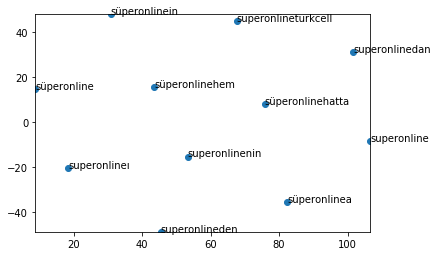

In [21]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
display_closestwords_tsnescatterplot(new_model, 'süperonline')

reference : https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229

In [22]:
w2v_model = new_model  

In [23]:

from __future__ import absolute_import, division, print_function
import numpy as np
count = 100  #len(w2v_model.wv.vocab)
word_vectors_matrix = np.ndarray(shape=(count, 100), dtype='float64')
word_list = []
i = 0
for word in (w2v_model.wv.vocab):
    word_vectors_matrix[i] = w2v_model[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

word_vectors_matrix shape is  (100, 100)


/home/halil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [24]:
#Compress the word vectors into 2D space
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

word_vectors_matrix_2d shape is  (100, 2)


In [25]:
#Compress the word vectors into 2D space
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

word_vectors_matrix_2d shape is  (100, 2)


In [26]:
import pandas as pd
points = pd.DataFrame(
    [
        (word, coords[0], coords[1]) 
        for word, coords in [
            (word, word_vectors_matrix_2d[word_list.index(word)])
            for word in word_list
        ]
    ],
    columns=["word", "x", "y"]
)
print("Points DataFrame built")


Points DataFrame built


In [27]:
points.head(10)

,word,x,y
0,superonline,2.722280,-7.242220
1,milyon,5.866268,4.512696
2,evin,4.430247,-0.570544
3,kapisina,4.274471,-1.097649
4,fiber,4.386678,-0.724296
5,internet,2.780843,-7.072840
6,goturdu,5.719471,3.704341
7,bizde,3.095781,-4.494260
8,yok,3.015850,-6.197225
9,bize,3.646751,-3.337726


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("poster")

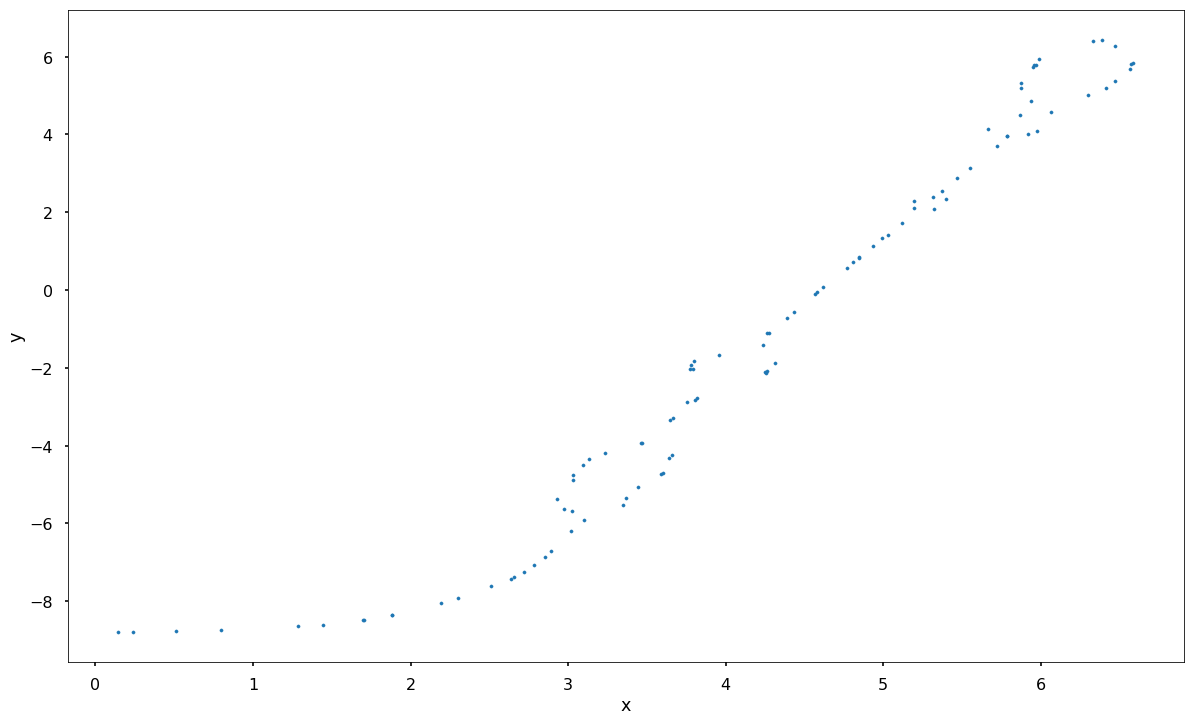

In [29]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [30]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1]) 
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)


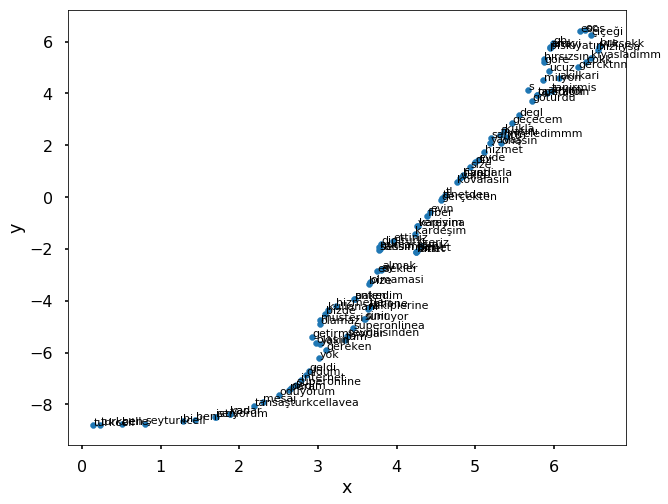

In [31]:
plot_region(x_bounds=(-60.2, 60.2), y_bounds=(-60.2, 60.0))

reference : https://github.com/MiguelSteph/word2vec-with-gensim/blob/master/word2vec_model_visualization.ipynb

In [32]:
result = model.most_similar(positive=['sinir', 'ucuz'], negative=['musteri'], topn=1)
result

/home/halil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ucuzundan', 0.9993242621421814)]

In [33]:
new_model.similarity('türkcell','kampanya')

/home/halil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9999579358193459

In [34]:
new_model.n_similarity(['ucuz', 'sinir'], ['lanet', 'hizmetleri'])

/home/halil/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  """Entry point for launching an IPython kernel.


0.9999010763024518